# Set path - Init 

In [47]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 

import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


# I ) Fitting w/o background signal 

In [48]:
#first we need to generate some data ...

N_events=10000

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.52308464050293
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.467095851898193


In [10]:
print(toy_signalSM.events)

tf.Tensor(
[[ 2.307535    0.8323531  -0.49167204  1.3535244 ]
 [ 6.0760117   0.5558088  -0.28865385 -0.02955461]
 [ 4.4417753  -0.4157672  -0.87566376  0.7536917 ]
 ...
 [ 2.2171173   0.3232057  -0.03011227 -2.0133467 ]
 [ 6.697322    0.17486382  0.91185117  3.0969694 ]
 [ 5.576185   -0.86947894  0.02493596 -2.5771823 ]], shape=(10000, 4), dtype=float32)


In [49]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_array
betas1=[0.5 , 0.55 , 0.6 , 0.75 , 0.8 , 0.85 , 0.9 , 0.95]
opt_params= {'beta_1': betas1[0]}
optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , verbose=True , opt_params=opt_params)

INIT=toy_signalSM.coeff_init 
print(INIT)
for j in range(1 ,len(betas1)):
    print(j)
    opt_params= {'beta_1': betas1[j]}

    optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=FX , coefini=INIT ,  verbose=False , opt_params=opt_params)

    print(optimizerTF.optimizer.get_config())

    INIT=toy_signalSM.coeff_init 
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'SAME SIGN' , fixed=FX , coefini=INIT, verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-0.97759724, -0.009233087, 3.4424338, 0.009711499, -0.00013177143, 0.4612594, -0.111095846, -0.0020311968, 11.053458, 0.311223, -0.0018272102, -0.20834965, 6.898884, 0.15879267, -15.912938, -0.039127618, 0.003364127, -0.09463596, -0.6309227, 0.054392975, -1.3920212, 0.0, 0.0, 0.0, 5.151928, -0.11897318, 11.505583, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.931005, 0.0, 0.0, 1.3314941, 0.0, 0.0, 1.4137654, 0.0, 0.0, 1.7590878, 0.0, 0.0]


KeyboardInterrupt: 

In [50]:
X=[]
print(fix_array)
fix_array=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
print(fix_array)
for j in tqdm(range(5)):
    optimizeMigrad , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)


  0%|          | 0/5 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]


 20%|██        | 1/5 [00:08<00:35,  8.90s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.3910215, -0.16692093, 5.3044653, 0.54435056, -0.05531751, 0.051932212, -1.1144145, 0.18085913, 7.7129164, -0.4061754, 0.00550738, 0.26185888, 3.0600367, 0.16482435, -6.9897895, 0.25298643, -0.047233928, -0.39749864, -1.2578962, 0.1698969, -6.116597, 0.0, 0.0, 0.0, 6.5312357, -0.23103155, 9.293969, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8083695, 0.0, 0.0, 0.66199416, 0.0, 0.0, 1.1897846, 0.0, 0.0, 1.0826509, 0.0, 0.0]


 40%|████      | 2/5 [00:18<00:27,  9.06s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-5.1691966, -0.25506553, 8.088216, 0.82925195, -0.08423046, 0.08032451, -1.6615961, 0.2704993, 11.710978, -0.65367186, 0.014660617, 0.43830764, 4.665852, 0.25142044, -10.6571045, 0.38362834, -0.071500905, -0.6046082, -1.8785003, 0.25336024, -9.381771, 0.0, 0.0, 0.0, 9.960924, -0.35238433, 14.173271, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2328053, 0.0, 0.0, 1.0123597, 0.0, 0.0, 1.8139622, 0.0, 0.0, 1.6523176, 0.0, 0.0]


 60%|██████    | 3/5 [00:26<00:17,  8.82s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.4893568, -0.17063966, 5.4566174, 0.5600096, -0.056934014, 0.051957626, -1.1820183, 0.1909862, 7.973323, -0.44787705, 0.010309499, 0.30869415, 3.1384122, 0.1700514, -7.1747212, 0.2597055, -0.048322324, -0.41096693, -1.320194, 0.17829151, -6.2443542, 0.0, 0.0, 0.0, 6.709308, -0.23731579, 9.547756, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8304308, 0.0, 0.0, 0.6811001, 0.0, 0.0, 1.2225424, 0.0, 0.0, 1.1109511, 0.0, 0.0]


 80%|████████  | 4/5 [00:35<00:08,  8.94s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.486482, -0.22111134, 7.0192914, 0.71979064, -0.07312146, 0.06934417, -1.4542719, 0.23643413, 10.178897, -0.5621861, 0.011687756, 0.37536284, 4.0477123, 0.21828063, -9.246445, 0.33378014, -0.062200293, -0.5258958, -1.6426427, 0.22160868, -8.122997, 0.0, 0.0, 0.0, 8.6428175, -0.3057353, 12.2984085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0696927, 0.0, 0.0, 0.87786084, 0.0, 0.0, 1.5741575, 0.0, 0.0, 1.4333053, 0.0, 0.0]


100%|██████████| 5/5 [01:04<00:00, 14.87s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.771458, -0.18510893, 5.899011, 0.6053124, -0.061526347, 0.057215028, -1.2459282, 0.20205055, 8.581399, -0.44763708, 0.0054436717, 0.28683707, 3.3981628, 0.18350725, -7.764538, 0.28215557, -0.052640583, -0.44310293, -1.4040878, 0.18970124, -6.7894616, 0.0, 0.0, 0.0, 7.2583165, -0.25674772, 10.328726, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.89836824, 0.0, 0.0, 0.7354413, 0.0, 0.0, 1.3223172, 0.0, 0.0, 1.2029544, 0.0, 0.0]


In [51]:

names=amplitude_latex_names
print(names)


'''
for i in range(len(fix_array)):
    if fix_array[i]==0:
        
        mean=np.mean(X[:,i])
        std=np.std(X[:,i])
        ste=std/np.sqrt(N_events)
        print('\n')
        print('NAME : ', amplitude_latex_names[I])

        print(X[:,i])

        print('Mean : ' , mean)
        print('Std : ' , ste)
        print('1sigma range : ' , (mean-ste , mean+ste))
'''

['Re($A_{\\parallel}^L$)', 'Im($A_{\\parallel}^L$)', 'Re($A_{\\parallel}^R$)', 'Im($A_{\\parallel}^R$)', 'Re($A_{\\bot}^L$)', 'Im($A_{\\bot}^L$)', 'Re($A_{\\bot}^R$)', 'Im($A_{\\bot}^R$)', 'Re($A_{0}^L$)', 'Im($A_{0}^L$)', 'Re($A_{0}^R$)', 'Im($A_{0}^R$)', 'Re($A_{00}^L$)', 'Im($A_{00}^L$)', 'Re($A_{00}^R$)', 'Im($A_{00}^R$)']


"\nfor i in range(len(fix_array)):\n    if fix_array[i]==0:\n        \n        mean=np.mean(X[:,i])\n        std=np.std(X[:,i])\n        ste=std/np.sqrt(N_events)\n        print('\n')\n        print('NAME : ', amplitude_latex_names[I])\n\n        print(X[:,i])\n\n        print('Mean : ' , mean)\n        print('Std : ' , ste)\n        print('1sigma range : ' , (mean-ste , mean+ste))\n"

[ 0.00858538 -0.001823    0.4660742 ]
[-0.30245122  0.05637961  0.4764145 ]
1
[ 0.5035095  -0.00952178 -0.33421212]
5


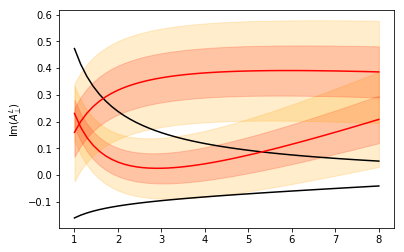

In [53]:
#Want to check for degeneracies 

x=np.linspace(1,8)

#print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
#print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))
#print(X)


Average=[]
StandarD=[]
for i in range(48):
    Average.append(np.mean(X[:,i]))
    StandarD.append(np.std(X[:,i]))

AV=np.reshape(Average,(16,3))
STD=np.reshape(StandarD,(16,3))

def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))

ID=np.reshape(toy_signalSM.coeffs,(16,3))

OrderI=np.arange(16)
OrderII=np.array([0, 5, 2, 1, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Pseudo=np.array([1 , -1 , 1 , -1 , 1 , -1 , 1, 1, 1 , 1 , 1 , 1 ,1 ,1 ,1 ,1])

# aproximate degeneracies in A_para_l & (- A_perp_l) ,  A_perp_l & (- A_para_l/2) ,  A_para_r & (- A_perp_r)
# corresponds to 

id1=1
param1=Pseudo[id1]*AV[int(OrderII[id1]),:]
err1=Pseudo[id1]*STD[int(OrderII[id1]),:]
ex1=ID[id1,:]

id2=5
param2=Pseudo[id2]*AV[int(OrderII[id2]),:]
err2=Pseudo[id2]*STD[int(OrderII[id2]),:]
ex2=ID[id2,:]
print(ex1)

PARAM=[param1 , param2]
ERR=[err1 , err2]
EX=[ex1,ex2]
compare=[id1 , id2]

for j in range(len(compare)):
    
    id1=compare[j]
    ex1=EX[j]
    param1=PARAM[j]
    print(param1)
    err1=ERR[j]
    print(id1)
    plt.plot(x , ansatz(ex1[0] , ex1[1] , ex1[2] , x) , 'k')

    plt.fill_between(x , ansatz(param1[0] , param1[1] , param1[2] , x) - error1(err1[0],err1[1],err1[2], x) , 
                     ansatz(param1[0] , param1[1] , param1[2] , x) + error1(err1[0],err1[1],err1[2], x)  , alpha=0.2 , color='red')
    plt.fill_between(x , ansatz(param1[0] , param1[1] , param1[2] , x) - 2*error1(err1[0],err1[1],err1[2], x) , 
                     ansatz(param1[0] , param1[1] , param1[2] , x) + 2*error1(err1[0],err1[1],err1[2], x)  , alpha=0.2 , color='orange')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param1[0] , param1[1] , param1[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[id1])
plt.show()



Order : 0
[-4.1781025  -0.15184344  6.8183246 ]


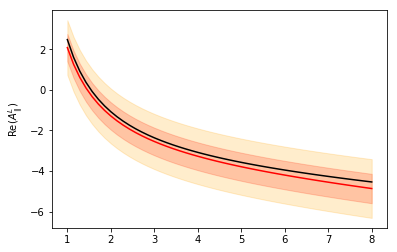

Order : 1
[ 0.00858538 -0.001823    0.4660742 ]


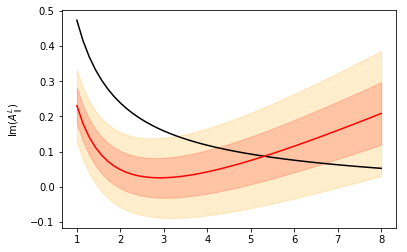

Order : 2
[-2.3538125e-01 -4.3176315e-03  8.0037451e+00]


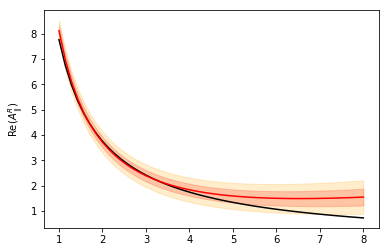

Order : 3
[ 0.16564202 -0.01309588 -0.30668017]


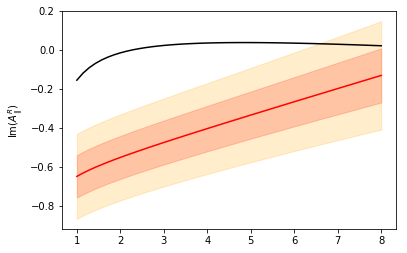

Order : 4
[ 3.8864067   0.08526551 -8.197446  ]


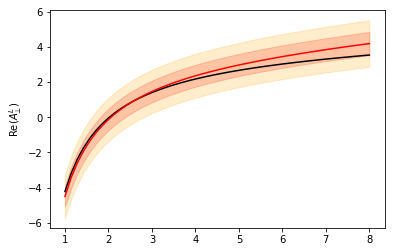

Order : 5
[-0.09505176  0.00793401 -0.07297003]


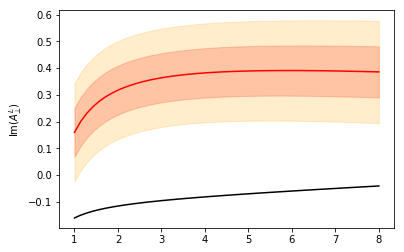

Order : 6
[-0.4235836   0.02729899 -7.147451  ]


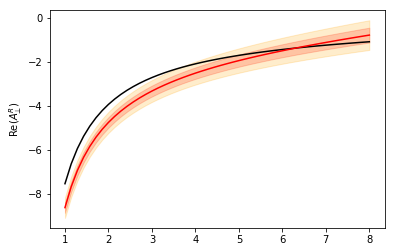

Order : 7
[0. 0. 0.]


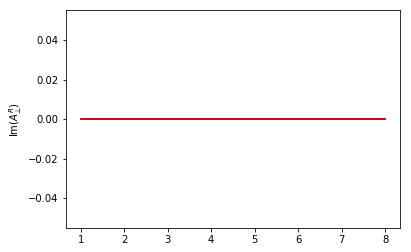

Order : 8
[ 7.202759  -0.2278163  9.89863  ]


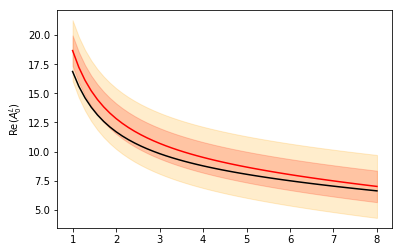

Order : 9
[0. 0. 0.]


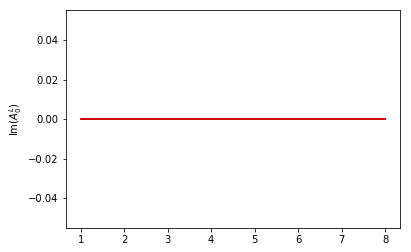

Order : 10
[0. 0. 0.]


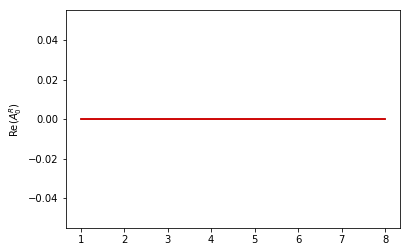

Order : 11
[0. 0. 0.]


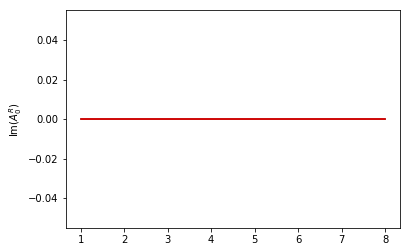

Order : 12
[1. 0. 0.]


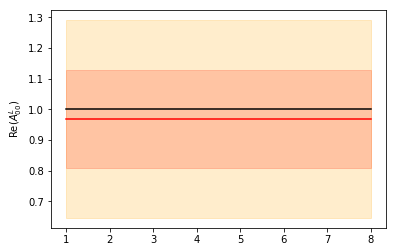

Order : 13
[1. 0. 0.]


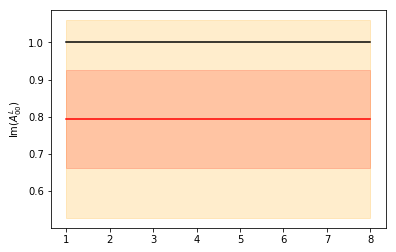

Order : 14
[1. 0. 0.]


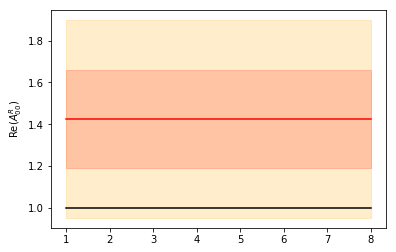

Order : 15
[1. 0. 0.]


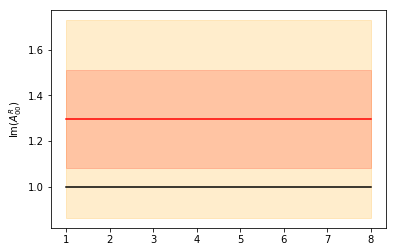

In [54]:

for I in range(16):
    print('Order :', I)
    param=Pseudo[I]*AV[int(OrderII[I]),:]
    err=Pseudo[I]*STD[int(OrderII[I]),:]
    ex=ID[I,:]
    print(ex)
    plt.plot(x , ansatz(ex[0] , ex[1] , ex[2] , x) , 'k')

    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='red')
    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - 2*error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + 2*error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='orange')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param[0] , param[1] , param[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[I])
    plt.show()
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


# II ) Testing data generation with background 

In [15]:
from b_meson_fit.optimizer_extended import Optimizer_Extended 
import b_meson_fit.background as background
import b_meson_fit.signal as bmfs 
import tensorflow.compat.v2 as tf 


sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8)
ndat = tf.constant(1000000)
nback = tf.Variable(10000)

coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]

In [17]:
#generate events 

BCK=[back_coeffs[i].numpy() for i in range(len(back_coeffs))]
SIGNAL=[sig_coeffs[i].numpy() for i in range(len(sig_coeffs))]


print('Background coefficients : ', '\n' , BCK , '\n' )
print('Signal coefficients : ' , '\n' ,  SIGNAL , '\n')
events = bmfs.generate_background(BCK,1000,1000000)

events_bck = bmfs.generate_background_mass(BCK)

events_signal= bmfs.generate_signal_mass(SIGNAL)

events = bmfs.generate_all(sig_coeffs, back_coeffs,events_total=100000, alpha = 0.8, poisson = False)

Background coefficients :  
 [100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0] 

Signal coefficients :  
 [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0] 



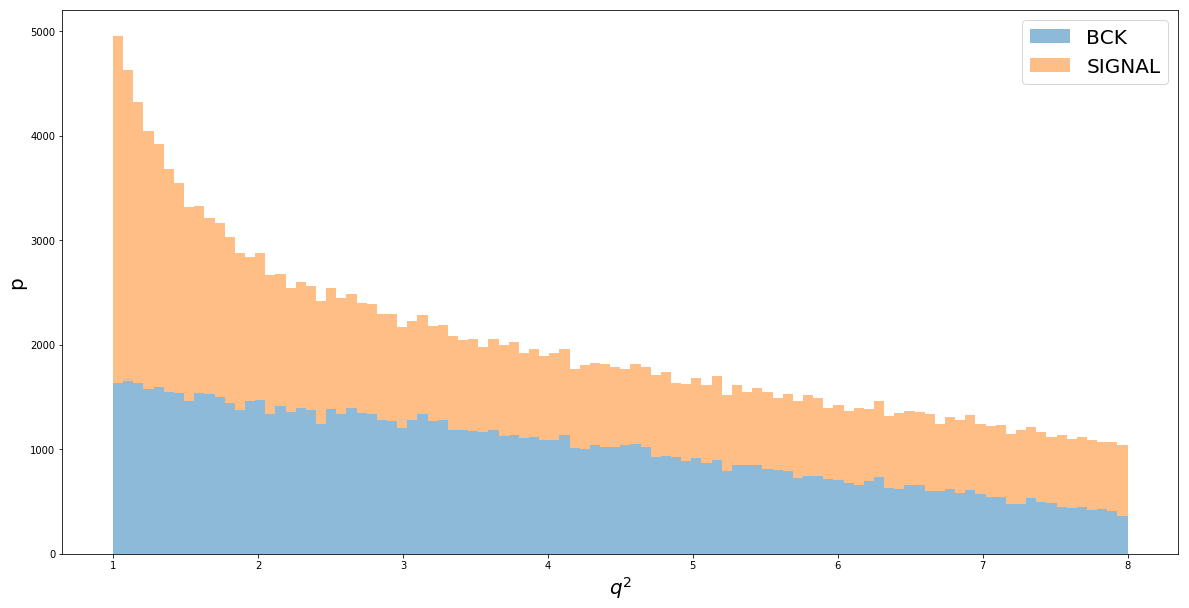

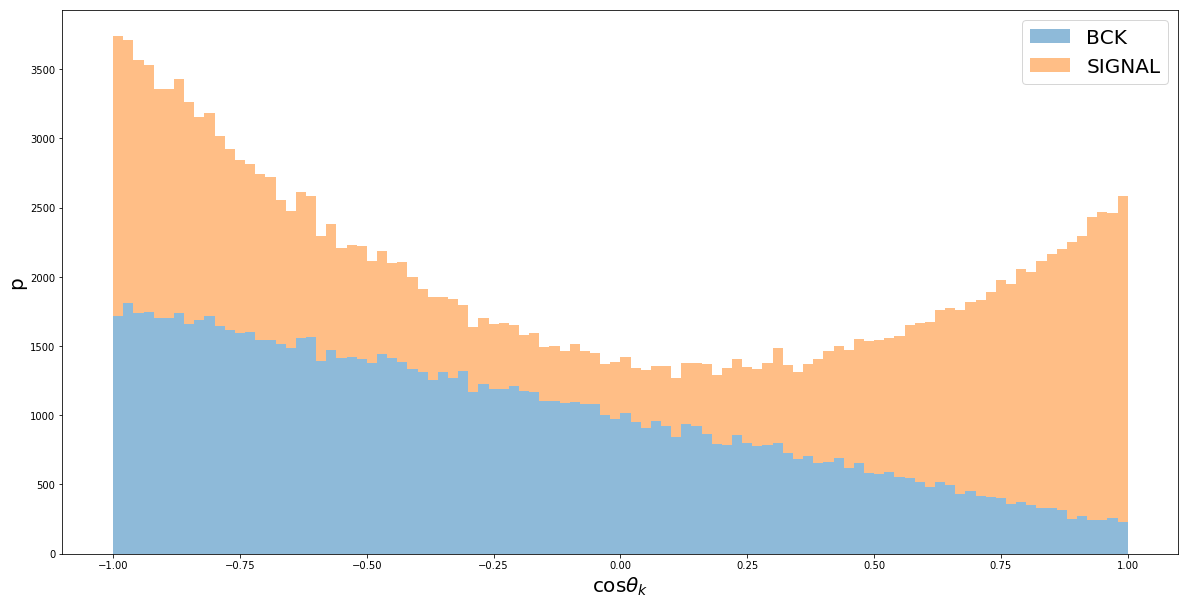

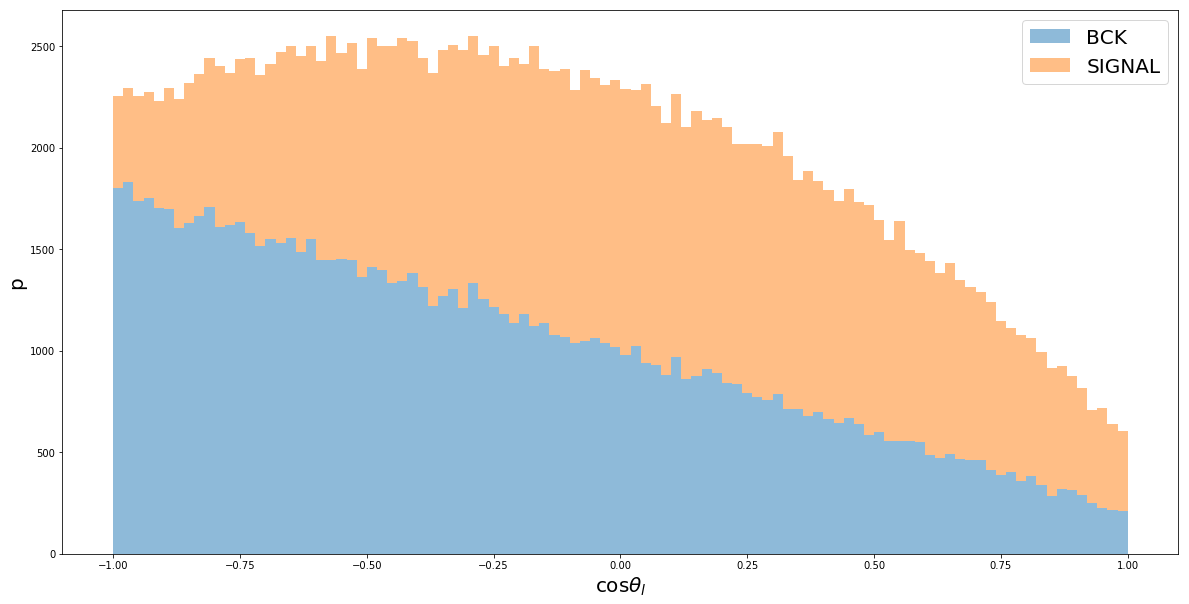

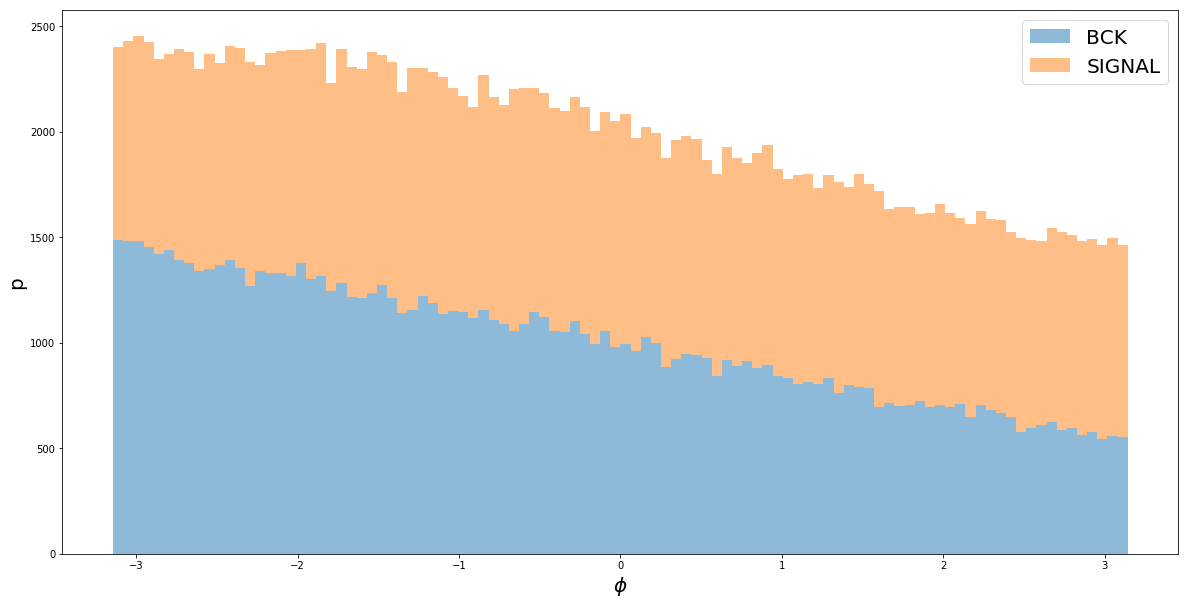

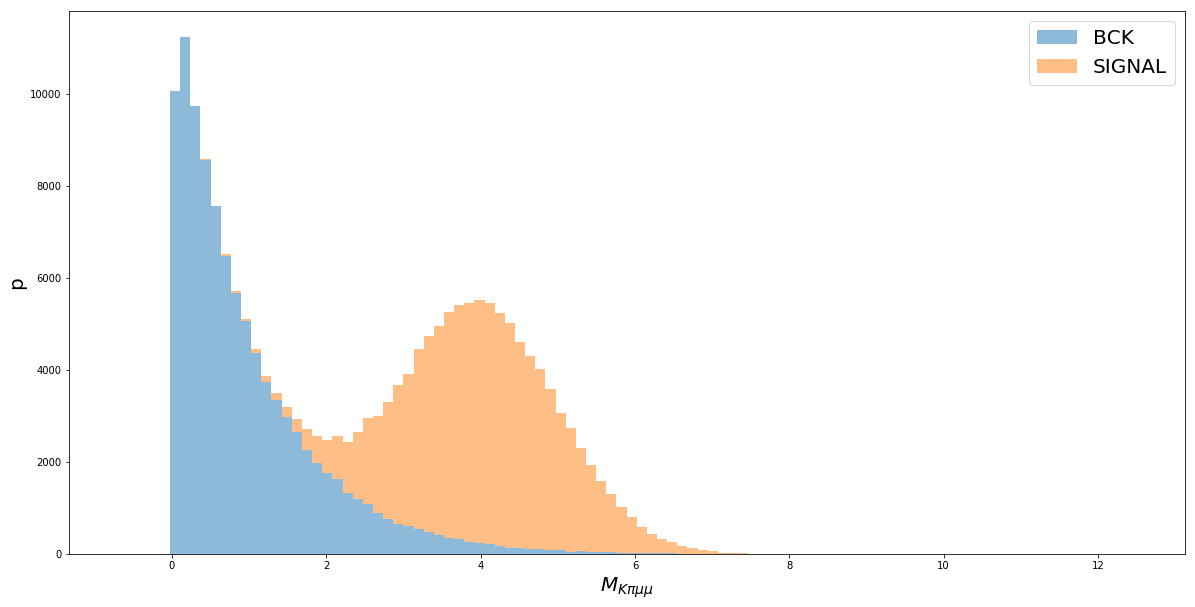

In [18]:
#Plot the observables 

plt.rcParams["figure.figsize"] = (20,10)
Labels=['BCK' , 'SIGNAL']
labels=[r'$q^{2}$' , r'cos$\theta_{k}$' , r'cos$\theta_{l}$' , r'$\phi$' , r'$M_{K\pi\mu\mu}$' ]

for j in range(5):
    plt.hist([events_bck[:,j].numpy() , events_signal[:,j].numpy()]  , alpha=0.5 ,  bins=100 ,stacked=True , label=Labels)
    ax = plt.gca()
    ax.set_xlabel(labels[j] , fontsize=20)
    ax.set_ylabel('p' ,fontsize=20)
    
    ax.legend(fontsize=20)
    plt.show()



In [19]:
from itertools import islice 
import b_meson_fit.mass as mass
import b_meson_fit.background as bkg


Inputt = iter(coeffs) 
splits = [48,8,1,1,1]
sig_coeffs,back_coeffs,[nbar_dat],[n_back],[alpha] = [list(islice(Inputt, elem)) for elem in splits] #this may break

'''
print(back_coeffs, '\n')

print(nbar_dat, '\n')
print(n_back, '\n')
print(alpha, '\n')
'''

def signal_massTF(mass,mean = 4. ,sig = 1. ):
    #print(mass)
    ans = (tf.exp(-tf.math.square(mass - mean, 2.) / (2 * tf.math.square(sig, 2.))))/(sig*tf.math.sqrt(2*np.pi))
    return tf.reshape(ans , [len(ans),])


events_angles, events_mass = tf.split(events,[4,1],axis = 1)


signal = bmfs.pdf(sig_coeffs,events_angles)
masssss=signal_massTF(events_mass)
XXX=tf.math.multiply(signal , masssss)

#print(XXX)
#print(events_mass)
#print(signal)
print(masssss)

#*mass.signal_mass(events_mass)




tf.Tensor(
[3.7183464e-01 2.6788193e-01 3.9672723e-01 ... 1.3407793e-04 8.1523694e-03
 2.7286997e-01], shape=(99999,), dtype=float32)


In [20]:
coeffs = [*sig_coeffs,*back_coeffs,alpha,ndat,nback]


# Tests for exnll 

In [21]:
import b_meson_fit.signal as bmfs  
sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])


[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 100.0, -10.0, 100.0, -80.0, 100.0, -80.0, 100.0, -15.0, 10000.0, 2000.0, 0.8]


In [22]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    backg = tf.math.multiply(bkg.pdf(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
   
    likelihood = -tf.reduce_sum(
        tf.math.log(
            n_sig*signal
            +n_back*backg
        )
    )
    poisson_counting = (-1*tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)))+ n_sig + n_back
    print(poisson_counting)
    return (likelihood + poisson_counting)

exnll(coeffs,events)

tf.Tensor(-82094.195, shape=(), dtype=float32)


<tf.Tensor: id=567020, shape=(), dtype=float32, numpy=-300349.4>

In [23]:
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]
def exnll(coeffs,events):
    Inputt = iter(coeffs) 
    splits = [48,8,1,1,1]
    sig_coeffs,back_coeffs,nbar_dat,n_back,alpha = [list(islice(Inputt, elem)) for elem in splits] #this may break

    """
    Extended likelihood fit: ref petredis, patel et all for more!
    Events: Nx5
    """
    alpha = alpha[0]
    nbar_dat = nbar_dat[0]
    n_back = n_back[0]
    n_sig = nbar_dat*alpha
    events_angles, events_mass = tf.split(events,[4,1],axis = 1)

    signal = tf.math.multiply(bmfs.pdf(sig_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.signal_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
    
    backg = tf.math.multiply(bkg.pdf(back_coeffs,events_angles),tf.reshape(tf.convert_to_tensor(mass.background_mass(events_mass), dtype = tf.float32),[tf.shape(events_mass)[0],]))
   
    likelihood = -tf.reduce_sum(tf.math.log(tf.math.add(tf.math.multiply(n_sig,signal),tf.math.multiply(n_back,backg))))
    print('Actual likelihood')
    print(likelihood)
    poisson_counting = -tf.math.multiply(tf.cast(tf.shape(events)[0],dtype = 'float32'),tf.math.log(n_sig + n_back)) +n_sig+ n_back
    print('Poisson term')
    print(poisson_counting)
    return (likelihood + poisson_counting)

print(exnll(coeffs,events))
print('\n')
print(bmfs.exnll(coeffs,events))

Actual likelihood
tf.Tensor(-218337.97, shape=(), dtype=float32)
Poisson term
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-300432.16, shape=(), dtype=float32)


tf.Tensor(-218337.97, shape=(), dtype=float32)
tf.Tensor(-82094.195, shape=(), dtype=float32)
tf.Tensor(-300432.16, shape=(), dtype=float32)


In [ ]:
events_angles, events_mass = tf.split(events,[4,1],axis = 1)

a=mass.background_mass(events_mass)
plt.hist(events_mass)
plt.show()
print(max(a))

KeyboardInterrupt: 

# Tests fit with Background 


In [ ]:

sig_coeffs = bmf.coeffs.fit(initialization=bmf.coeffs.fit_initialization_scheme_default, current_signal_model="SM")
back_coeffs = background.back_coeffs_fit
alpha = tf.constant(0.8, dtype = 'float32')
ndat = tf.constant(10000, dtype = 'float32')
nback = tf.constant(2000, dtype = 'float32')

'''
print(sig_coeffs , '\n')
print(back_coeffs, '\n')
print(ndat, '\n')
print(nback)
'''
coeffs = [*sig_coeffs,*back_coeffs,ndat,nback,alpha]

events = bmf.signal.generate_all(sig_coeffs,back_coeffs,events_total=10000)
print([i.numpy() for i in coeffs])
optimizer = Optimizer_Extended(coeffs,events)
#print(optimizer._normalized_nll())


for i in range(10000000):
    optimizer.minimize()
    #print(optimizer.fit_coeffs[0])
    if optimizer.converged():
        print(optimizer._normalized_nll())
        break
print("not converged")

print([i.numpy() for i in optimizer.fit_coeffs] )

# III ) Fitting with background signal 

In [42]:
#perform fits using the migrad routine (minuit) and AMSGrad (tensorflow)
FX=fix_alphas 

optimizerTF , coeffTF = toy_signalSM.tf_fit(init= 'DEFAULT' , fixed=FX , verbose=True )
optimizeMigrad , coeffMigrad = toy_signalSM.minuitfit(init= 'DEFAULT' , fixed=FX , verbose=True)



 Coeffs used for MC: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Initial coeffs for tensorflow fit: [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]

  Fitted coefficients :  [-4.140053, -0.15184344, 6.8183246, -0.08432649, -0.0018230017, 0.4660742, -0.13008726, -0.